Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " Download ourcomplete COVID-19 dataset"scaricare il dataset nel formato che si preferisce.

In [1]:
# importiamo le librereie necessarie all' elaborazione del report

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importiamo il dataset

covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
# verifichiamo le dimensioni del dataset

print(f"Il dataset contiene {covid.shape[0]} righe e {covid.shape[1]} colonne.")
print(f"Il dataset contiene {covid.size} elementi.")

Il dataset contiene 429435 righe e 67 colonne.
Il dataset contiene 28772145 elementi.


In [4]:
#verifichiamo i metadati

print("Alcune informazioni generali sul dataset: \n")
covid.info()

Alcune informazioni generali sul dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed       

In [5]:
### CONSIDERAZIONE INIZIALE ###

### Nello svolgimento di questa analisi, mi sono reso conto che 26525 righe di questo dataset hanno valore nullo nella colonna 'continent'.
# covid[covid['continent'].isnull()].shape[0]

### Analizzando queste 26525  righe, le ho raggruppate per i valori della colonna 'location', sommando i valori della colonna 'new_cases' per vedere il totale dei contagi per ogni valore 'location'.
# covid[covid['continent'].isnull()].groupby('location')['new_cases'].sum()

### Vediamo innanzitutto come alcuni valori 'location' non sono riconducibili a delle nazioni, ma a dei sottogruppi (es. High-income countries), quindi sono trascurabili per le richieste della nostra analisi.
### Vediamo anche come alcune delle somme riportate combacino poi con le analisi eseguite successivamente (questo anche a conferma della loro correttezza).
### Il dataset risulta avere quindi una ridondanza di dati, che vengono ripetuti più volte sotto diverse forme.

### La decisione è quindi quella di non considerare le righe del dataset che hanno valore nullo nella colonna 'continent',
### non solo perchè non utili ai fini dell' analisi, ma anche perchè essendo ridondanti ci condurrebbero ad un analisi errata.

2. Si chiede di trovare, per ogni continente:

  * il numero di casi fin dall'inizio della pandemia
  * la percentuale rispetto al totale
mondiale del numero di casi

In [6]:
# per ogni continente
# il numero di casi fin dall'inizio della pandemia

# sommo, per ogni continente, i valori della colonna new_cases (nuovi contagi giornalieri), e li inserisco all'interno di una nuova variabile pd.Series
covid_continents = covid.groupby('continent')['new_cases'].sum()
# trasformo la pd.Series in un pd.DataFrame
covid_continents = pd.DataFrame(covid_continents)
# resetto l'indice del nuovo DataFrame
covid_continents = covid_continents.reset_index()
# rinomino le colonne del DataFrame
covid_continents.columns = ['Continente', 'Casi_tot']
#setto la colonna rinominata come indice
covid_continents.set_index('Continente', inplace=True)

#stampo il risultato
print("Questa tabella mostra, per ogni continente, il totale del numero dei casi dall'inizio della pandemia: \n")
covid_continents

Questa tabella mostra, per ogni continente, il totale del numero dei casi dall'inizio della pandemia: 



,Casi_tot
Continente,
Africa,13146831.0
Asia,301564180.0
Europe,252916868.0
North America,124492698.0
Oceania,15003468.0
South America,68811012.0


In [7]:
# la percentuale rispetto al totale mondiale del numero di casi

# stampo un output che mi mostra il totale mondiale del numero dei casi
print("Il totale mondiale del numero dei casi, senza considerare i record che non hanno registrato un continente, è di: ", covid.groupby('continent')['new_cases'].sum().sum())
# separatore output
print("---")
# aggiungo al df precedentemente creato una nuova colonna (%_su_totale), in cui per ogni continente calcolo la % sul totale mondiale
covid_continents['%_su_totale'] = round((covid_continents['Casi_tot'] * 100) / covid_continents['Casi_tot'].sum(), 2)

# stampo il df aggiornato
print("Questa tabella mostra, per ogni continente, la percentuale rispetto al totale mondiale del numero dei casi: \n")
covid_continents

Il totale mondiale del numero dei casi, senza considerare i record che non hanno registrato un continente, è di:  775935057.0
---
Questa tabella mostra, per ogni continente, la percentuale rispetto al totale mondiale del numero dei casi: 



,Casi_tot,%_su_totale
Continente,,
Africa,13146831.0,1.69
Asia,301564180.0,38.86
Europe,252916868.0,32.60
North America,124492698.0,16.04
Oceania,15003468.0,1.93
South America,68811012.0,8.87


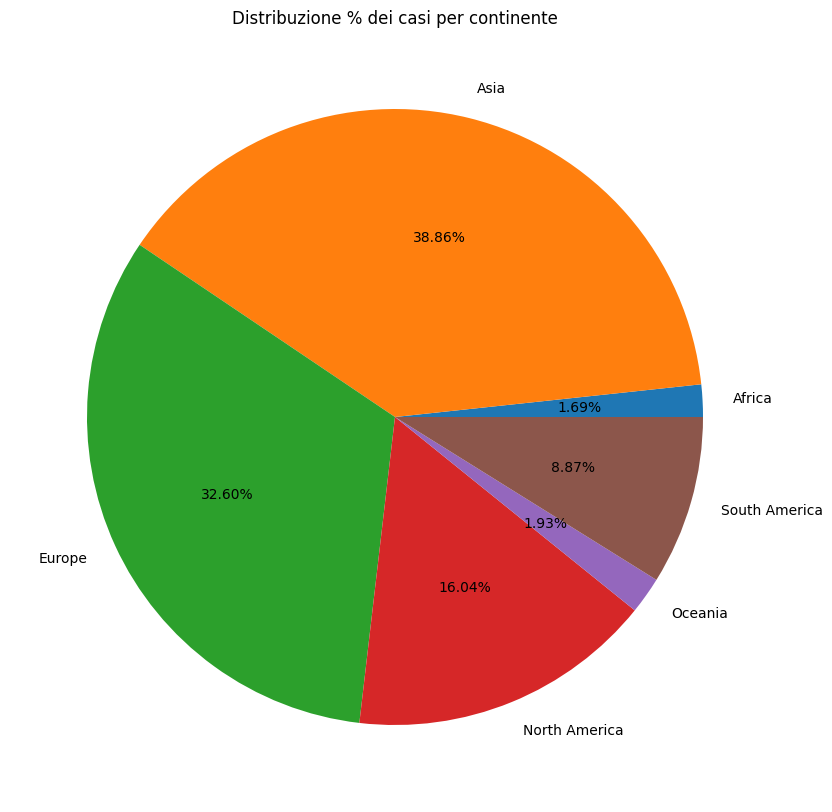

In [8]:
# stampiamo un grafico a torta sulla distribuzione dei casi per continente


# stampo un grafico a torta personalizzato relativo al df creato in precedenza
covid_continents.plot(kind = 'pie', y = 'Casi_tot', autopct='%1.2f%%', figsize=(10,10), legend = False)
plt.title('Distribuzione % dei casi per continente')
plt.ylabel('')
plt.show()

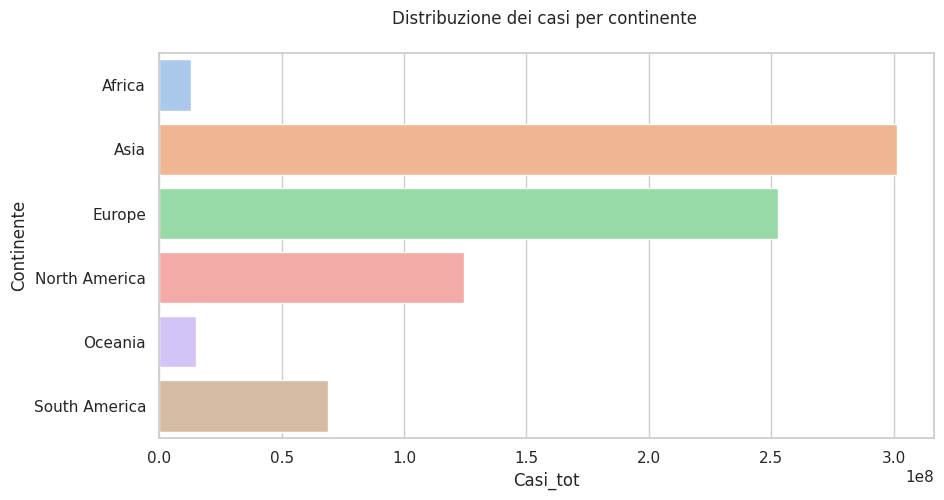

In [9]:
#stampiamo un grafico a barre sulla distribuzione dei casi per continente

# stampo un grafico a barre personalizzato relativo al df creato in precedenza
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(y = covid_continents.index, x = covid_continents['Casi_tot'], hue = covid_continents.index , palette = 'pastel', orient = 'h')
plt.title('Distribuzione dei casi per continente \n')
plt.show()


3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
  * l'evoluzione del casi totali dall'inizio alla fine dell'anno
  * il numero di nuovi casi rispetto alla data
    * poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

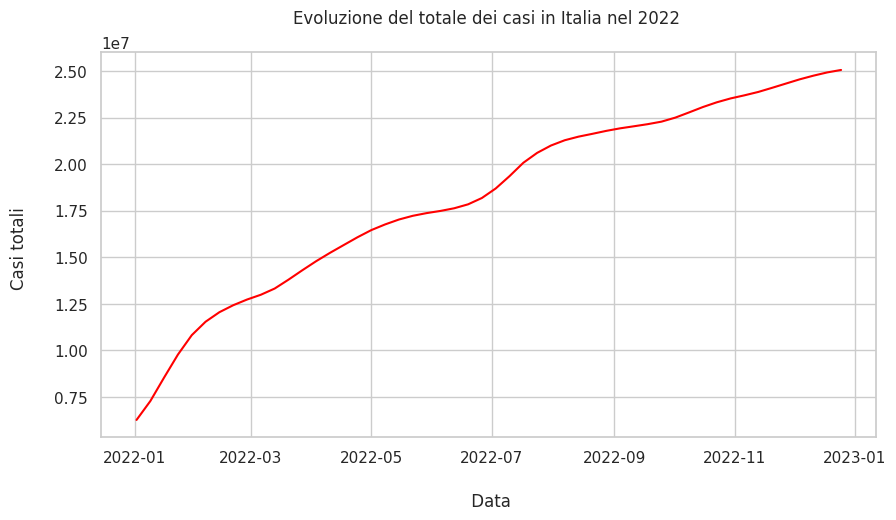

In [10]:
# grafico per mostrare l'evoluzione del casi totali in Italia dall'inizio alla fine dell'anno 2022

# trasformo il formato della colonna 'date', da object a datetime
covid['date'] = pd.to_datetime(covid['date'])
# creo un nuovo df che contenga solo i dati relativi alla richiesta
# in questo punto filtro via i dati che non hanno misurazioni nella colonna 'new_date' con la condizione covid['new_cases'] != 0
covid_italia_2022 = covid[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022) & (covid['new_cases'] != 0)]
# imposto la colonna 'date come indice del df
covid_italia_2022 = covid_italia_2022.set_index('date')

# stampo un lineplot personalizzato relativo all'andamento dei valori della colonna 'total_cases' rispetto alla data
plt.figure(figsize=(10,5))
sns.lineplot(data = covid_italia_2022, x = covid_italia_2022.index, y = 'total_cases', color = 'red')
plt.title('Evoluzione del totale dei casi in Italia nel 2022 \n')
plt.ylabel('Casi totali \n')
plt.xlabel('\n Data')
plt.show()

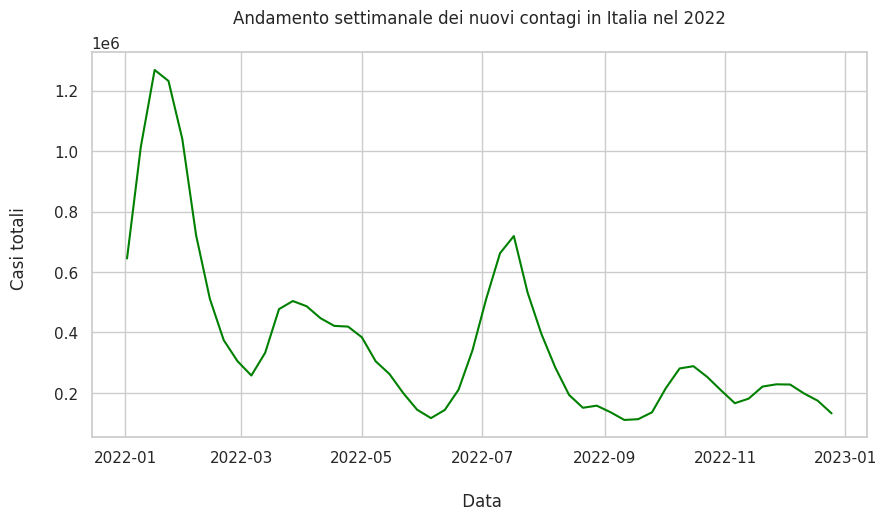

In [11]:
# grafico per mostrare l'andamento settimanale dei nuovi contagi in Italia dall'inizio alla fine dell'anno 2022


# stampo un lineplot personalizzato relativo all'andamento dei valori della colonna 'new_cases' rispetto alla data
plt.figure(figsize=(10,5))
sns.lineplot(data = covid_italia_2022, x = covid_italia_2022.index, y = 'new_cases', color = 'green')
plt.title('Andamento settimanale dei nuovi contagi in Italia nel 2022\n')
plt.ylabel('Casi totali \n')
plt.xlabel('\n Data')
plt.show()

4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
  * scrivere un breve commento a riguardo

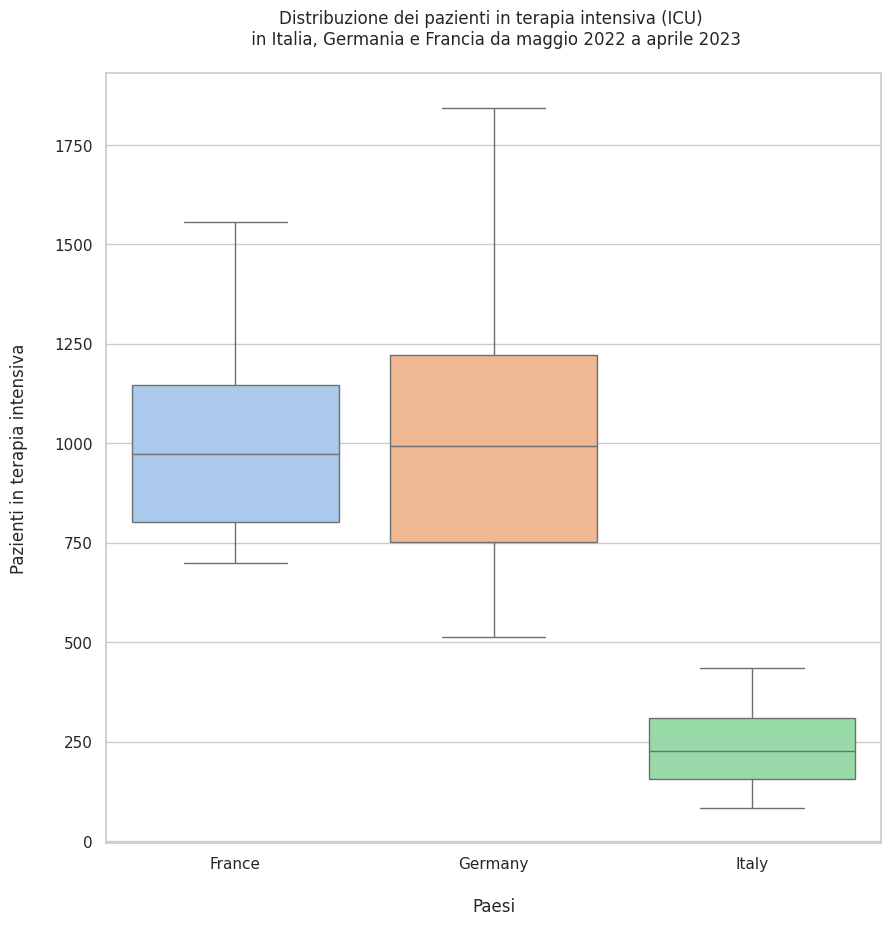

In [12]:
# Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti
# in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

# creo un nuovo df che contenga solo i dati relativi alla richiesta
icu_request = covid[(covid['location'].isin(['Italy', 'Germany', 'France'])) & (covid['date'] >= '2022-05-01') & (covid['date'] <= '2023-04-30')]

# stampo un boxplot che mette a confronto la distribuzione del numero di pz in terapia intensiva nei tre stati
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.boxplot(x = 'location', y = 'icu_patients', data = icu_request, palette = 'pastel', hue = 'location')
plt.title('Distribuzione dei pazienti in terapia intensiva (ICU) \n in Italia, Germania e Francia da maggio 2022 a aprile 2023\n')
plt.xlabel('\nPaesi')
plt.ylabel('Pazienti in terapia intensiva\n')
plt.show()



In [13]:
#scrivere un breve commento a riguardo

### Il grafico mostra che in Italia la distribuzione mediana dei pazienti ricoverati in terapia intensiva è nettamente inferiore (circa 250 al giorno) rispetto a quellla degli altri due paesi (circa 1000).
### Tutte e tre le scatole hanno la linea divisoria (che indica la mediana) pressochè al centro della scatola, ad indicare una distribuzione simmetrica dei dati.
### La dimensione ridotta, rispetto alle altre due, della scatola relativa all'Italia indica una minor differenza tra il 25° e il 75° percentile dei dati rispetto alle altre due nazioni
### Rispetto alle altre due nazioni, l'Talia ha anche una minore variazione dei dati attesa (rappresentata dalla lunghezza dei baffi). I dati non presentano outlier.

4. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
  * mostrare la somma dei pazienti ospitalizzati per ognuna
  * se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [14]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023, mostrare la somma dei pazienti ospitalizzati per ognuna

# creo un nuovo df che contenga solo i dati relativi alla richiesta
hosp_request = covid[(covid['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (covid['date'].dt.year == 2023)]
# sommo, per ogni nazione, i valori della colonna hosp_patients (pz ospitalizzati ogni giorno), e li inserisco all'interno di una nuova variabile pd.Series
hosp_request_group = hosp_request.groupby('location')['hosp_patients'].sum()
hosp_request_group = pd.DataFrame(hosp_request_group)
# resetto l'indice del nuovo DataFrame
hosp_request_group = hosp_request_group.reset_index()
# rinomino le colonne del DataFrame
hosp_request_group.columns = ['Paese', 'Pazienti_ospitalizzati']
#setto la colonna rinominata come indice
hosp_request_group.set_index('Paese', inplace=True)

# stampo il risultato
print("Questa tabella mostra, per ogni nazione, la somma dei pazienti ospitalizzati in tutto il 2023: \n")
hosp_request_group


Questa tabella mostra, per ogni nazione, la somma dei pazienti ospitalizzati in tutto il 2023: 



,Pazienti_ospitalizzati
Paese,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0


In [15]:
# se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

### Notiamo che la colonna relativa ai pazienti ospitalizzati, se si filtrano i soli dati relativi alla Germania, ha esclusivamente valori nulli, non solo nel 2023 ma in tutti gli anni.

### Questi dati filtrati hanno anche la colonna 'hosp_patients_per_million' popolata solo da dati nulli, quindi questa colonna non è utile per una possibile sostituzione

### Una colonna che per questi dati è popolata e potrebbe essere utile è 'weekly_hosp_admissions', ma, dopo averla studiata sul sito di origine del dataset
### e facendo alcune prove di codice, non sono riuscito a capire bene che genere di dato riporta, dato che la somma dei dati non era coerente.

### Pertanto la mia idea è quella di non sostituire questi dati nulli, anche considerando l'importanza della tematica che riportano, per non fornire delle informazioni che,
### oltre che errate, potrebbero risultare dannose per gli scopi che hanno reso necessaria questa analisi.